# Fine-tune a LLM using Colab and LLaMA-Factory



# 1. Clone LLaMa-Factory (10~20s)

In [ ]:
%rm -rf LLaMA-Factory
!git clone https://github.com/hiyouga/LLaMA-Factory.git

Cloning into 'LLaMA-Factory'...
remote: Enumerating objects: 9476, done.
remote: Counting objects: 100% (1706/1706), done.
remote: Compressing objects: 100% (437/437), done.
remote: Total 9476 (delta 1443), reused 1382 (delta 1265), pack-reused 7770
Receiving objects: 100% (9476/9476), 213.07 MiB | 22.62 MiB/s, done.
Resolving deltas: 100% (6983/6983), done.
Updating files: 100% (194/194), done.


# 2. Install libs (1~2mins)

In [ ]:
%cd /content/LLaMA-Factory
!pip install .
!pip install tiktoken einops transformers_stream_generator auto_gptq>=0.5.0
!pip install rouge-chinese

/content/LLaMA-Factory
Processing /content/LLaMA-Factory
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.4/297.4 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.1/244.1 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py)

## Check GPU environment

In [ ]:
import torch
try:
  assert torch.cuda.is_available() is True
except AssertionError:
  print("Please set up a GPU before using LLaMA Factory")

# 3. Fine-tune a pre-trained model to answer financial course exam questions in Chinese
- Pre-trained model: Qwen1.5-1.8B-Chat
- Datasets for fine-tuning: identity.json, [FinGPT/fingpt-fineval](https://huggingface.co/datasets/FinGPT/fingpt-fineval)
- Decide the hyperparameters by yourself (but note the GPU limitations of Colab free)

## 3.1 Check the performance of a pre-trained model (Qwen1.5-1.8B-Chat)

In [ ]:
from llmtuner import ChatModel


# Run the fine-tuned Qwen1.5-1.8B-Chat (pre-trained)
pretained_model = ChatModel(dict(
  model_name_or_path="Qwen/Qwen1.5-1.8B-Chat",
  template="qwen",
  dataset="identity.json, FinGPT/fingpt-fineval",
  cutoff_len= 1024,
  max_samples= 50,
  max_new_tokens= 200,
  top_p= 0.8,
  temperature= 0.8,


))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/1056 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/265 [00:00<?, ? examples/s]

tokenizer_config.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

[INFO|tokenization_utils_base.py:2046] 2024-04-17 04:14:52,996 >> loading file vocab.json from cache at /root/.cache/huggingface/hub/models--Qwen--Qwen1.5-1.8B-Chat/snapshots/99f64b6aee2077dc9787342a0eb747fb8126b761/vocab.json
[INFO|tokenization_utils_base.py:2046] 2024-04-17 04:14:52,998 >> loading file merges.txt from cache at /root/.cache/huggingface/hub/models--Qwen--Qwen1.5-1.8B-Chat/snapshots/99f64b6aee2077dc9787342a0eb747fb8126b761/merges.txt
[INFO|tokenization_utils_base.py:2046] 2024-04-17 04:14:53,000 >> loading file added_tokens.json from cache at None
[INFO|tokenization_utils_base.py:2046] 2024-04-17 04:14:53,002 >> loading file special_tokens_map.json from cache at None
[INFO|tokenization_utils_base.py:2046] 2024-04-17 04:14:53,003 >> loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--Qwen--Qwen1.5-1.8B-Chat/snapshots/99f64b6aee2077dc9787342a0eb747fb8126b761/tokenizer_config.json
[INFO|tokenization_utils_base.py:2046] 2024-04-17 04:14:53,

04/17/2024 04:14:53 - INFO - llmtuner.data.template - Replace eos token: <|im_end|>


INFO:llmtuner.data.template:Replace eos token: <|im_end|>


config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

[INFO|configuration_utils.py:728] 2024-04-17 04:14:53,925 >> loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--Qwen--Qwen1.5-1.8B-Chat/snapshots/99f64b6aee2077dc9787342a0eb747fb8126b761/config.json
[INFO|configuration_utils.py:791] 2024-04-17 04:14:53,933 >> Model config Qwen2Config {
  "_name_or_path": "Qwen/Qwen1.5-1.8B-Chat",
  "architectures": [
    "Qwen2ForCausalLM"
  ],
  "attention_dropout": 0.0,
  "bos_token_id": 151643,
  "eos_token_id": 151645,
  "hidden_act": "silu",
  "hidden_size": 2048,
  "initializer_range": 0.02,
  "intermediate_size": 5504,
  "max_position_embeddings": 32768,
  "max_window_layers": 21,
  "model_type": "qwen2",
  "num_attention_heads": 16,
  "num_hidden_layers": 24,
  "num_key_value_heads": 16,
  "rms_norm_eps": 1e-06,
  "rope_theta": 1000000.0,
  "sliding_window": 32768,
  "tie_word_embeddings": false,
  "torch_dtype": "bfloat16",
  "transformers_version": "4.38.2",
  "use_cache": true,
  "use_sliding_window": f

04/17/2024 04:14:53 - INFO - llmtuner.model.patcher - Using KV cache for faster generation.


INFO:llmtuner.model.patcher:Using KV cache for faster generation.


model.safetensors:   0%|          | 0.00/3.67G [00:00<?, ?B/s]

[INFO|modeling_utils.py:3257] 2024-04-17 04:15:20,728 >> loading weights file model.safetensors from cache at /root/.cache/huggingface/hub/models--Qwen--Qwen1.5-1.8B-Chat/snapshots/99f64b6aee2077dc9787342a0eb747fb8126b761/model.safetensors
[INFO|modeling_utils.py:1400] 2024-04-17 04:15:20,766 >> Instantiating Qwen2ForCausalLM model under default dtype torch.float16.
[INFO|configuration_utils.py:845] 2024-04-17 04:15:20,771 >> Generate config GenerationConfig {
  "bos_token_id": 151643,
  "eos_token_id": 151645
}

[INFO|modeling_utils.py:3992] 2024-04-17 04:15:28,801 >> All model checkpoint weights were used when initializing Qwen2ForCausalLM.

[INFO|modeling_utils.py:4000] 2024-04-17 04:15:28,802 >> All the weights of Qwen2ForCausalLM were initialized from the model checkpoint at Qwen/Qwen1.5-1.8B-Chat.
If your task is similar to the task the model of the checkpoint was trained on, you can already use Qwen2ForCausalLM for predictions without further training.


generation_config.json:   0%|          | 0.00/206 [00:00<?, ?B/s]

[INFO|configuration_utils.py:800] 2024-04-17 04:15:29,316 >> loading configuration file generation_config.json from cache at /root/.cache/huggingface/hub/models--Qwen--Qwen1.5-1.8B-Chat/snapshots/99f64b6aee2077dc9787342a0eb747fb8126b761/generation_config.json
[INFO|configuration_utils.py:845] 2024-04-17 04:15:29,319 >> Generate config GenerationConfig {
  "bos_token_id": 151643,
  "do_sample": true,
  "eos_token_id": [
    151645,
    151643
  ],
  "pad_token_id": 151643,
  "repetition_penalty": 1.1,
  "top_p": 0.8
}



04/17/2024 04:15:29 - INFO - llmtuner.model.adapter - Adapter is not found at evaluation, load the base model.


INFO:llmtuner.model.adapter:Adapter is not found at evaluation, load the base model.


04/17/2024 04:15:29 - INFO - llmtuner.model.loader - all params: 1836828672


INFO:llmtuner.model.loader:all params: 1836828672


In [ ]:
query = """建筑物火灾保险费率厘订方法一般有____。 A. 分类法 B. 表定法 C. 经验法 D. 分析法"""
messages = [{"role": "user", "content": query}]
resp = pretained_model.chat(messages, system="以下是中国关于金融工程学考试的单项选择题，请选出其中的正确答案。")
print(resp[0].response_text)

建筑物火灾保险费率厘订方法一般有经验法和分析法。经验法是通过统计分析建筑物的火灾损失数据，得出建筑物火灾保险费率的经验值，这种方法在实际操作中较为常用。分析法则是通过深入研究建筑物的结构、设计、使用状况、火灾风险等因素，分析火灾发生的原因、损失的大小和分布，从而为建筑物火灾保险费率的厘订提供理论依据。因此，正确答案是C和D。


In [ ]:
torch.cuda.empty_cache()

## 3.2 Prepare datasets for fine-tuning (10')
1. Create the new_identity.json by revising identity.json and add it into dataset_info.json
  - Replace NAME with your proposed LLM name and AUTHOR with your own name or student ID
2. Add fingpt-fineval into dataset_info.json
  - Copy the [dataset](https://huggingface.co/datasets/FinGPT/fingpt-fineval) name from Hugging Face
  - Add the dataset into /content/LLaMA-Factory/data/dataset_info.json


In [ ]:
# Create the new_identity.json

%cd /content/LLaMA-Factory
!sed 's/NAME/A4-LLM/' data/identity.json > data/new_identity.json
!sed -i 's/AUTHOR/121020064/' data/new_identity.json

import json

file_path = '/content/LLaMA-Factory/data/dataset_info.json'
with open(file_path, 'r') as file:
    data = json.load(file)

data['new_identity'] = {'file_name': 'new_identity.json'}

with open(file_path, 'w') as file:
    json.dump(data, file, indent=4)

/content/LLaMA-Factory


In [ ]:
# Add the dataset into /content/LLaMA-Factory/data/dataset_info.json
with open(file_path, 'r') as file:
    data = json.load(file)

data['fineval'] = {'hf_hub_url': 'FinGPT/fingpt-fineval',
            "columns": {
              "prompt": "instruction",
              "query": "input",
              "response": "output"}}

with open(file_path, 'w') as file:
    json.dump(data, file, indent=4)

## 3.3 Fine-tune the pre-trained Qwen1.5-1.8B-Chat (15')
- Complete the below function by specifying the required finetuning parameters
- Reuqired two finetuning datasets: 'new_identity', 'fineval'

In [ ]:
from llmtuner import run_exp
run_exp(dict(
  stage="sft", #supervised fine-tuning
  do_train=True, #training
  model_name_or_path="Qwen/Qwen1.5-1.8B-Chat", # specify the pre-trained model name
  template="qwen", # specify the template name for the pre-trained model
  dataset_dir="/content/LLaMA-Factory/data", # specify the folder path of the fine-tuning data
  dataset="new_identity,fineval", # specify the fine-tuning data
  finetuning_type="lora", # sp.ecify the fine-tuning type
  output_dir="saves/Qwen1.5-1.8B-Chat/lora/fineval", # specify the output folder path
  per_device_train_batch_size=2, # specify the batch size
  gradient_accumulation_steps=4, # specify the accumalation steps for gradient update
  lr_scheduler_type="cosine",
  logging_steps=5,
  save_steps=100,
  learning_rate=0.0002 , # specify learning rate
  num_train_epochs=5, # specify number of epochs
  max_samples=1000, # specify the number of samples for fine-tuning
  max_grad_norm=1.0,
  fp16=True,
  overwrite_output_dir=True # allow overwriting the output folder
))


04/17/2024 05:27:14 - INFO - llmtuner.hparams.parser - Process rank: 0, device: cuda:0, n_gpu: 1, distributed training: False, compute dtype: torch.float16


INFO:llmtuner.hparams.parser:Process rank: 0, device: cuda:0, n_gpu: 1, distributed training: False, compute dtype: torch.float16
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

[INFO|tokenization_utils_base.py:2046] 2024-04-17 05:27:16,310 >> loading file vocab.json from cache at /root/.cache/huggingface/hub/models--Qwen--Qwen1.5-1.8B-Chat/snapshots/99f64b6aee2077dc9787342a0eb747fb8126b761/vocab.json
[INFO|tokenization_utils_base.py:2046] 2024-04-17 05:27:16,312 >> loading file merges.txt from cache at /root/.cache/huggingface/hub/models--Qwen--Qwen1.5-1.8B-Chat/snapshots/99f64b6aee2077dc9787342a0eb747fb8126b761/merges.txt
[INFO|tokenization_utils_base.py:2046] 2024-04-17 05:27:16,314 >> loading file added_tokens.json from cache at None
[INFO|tokenization_utils_base.py:2046] 2024-04-17 05:27:16,316 >> loading file special_tokens_map.json from cache at None
[INFO|tokenization_utils_base.py:2046] 2024-04-17 05:27:16,318 >> loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--Qwen--Qwen1.5-1.8B-Chat/snapshots/99f64b6aee2077dc9787342a0eb747fb8126b761/tokenizer_config.json
[INFO|tokenization_utils_base.py:2046] 2024-04-17 05:27:16,

04/17/2024 05:27:16 - INFO - llmtuner.data.template - Replace eos token: <|im_end|>


INFO:llmtuner.data.template:Replace eos token: <|im_end|>


04/17/2024 05:27:16 - INFO - llmtuner.data.loader - Loading dataset new_identity.json...


INFO:llmtuner.data.loader:Loading dataset new_identity.json...


04/17/2024 05:27:16 - WARNING - llmtuner.data.utils - Checksum failed: missing SHA-1 hash value in dataset_info.json.


Generating train split: 0 examples [00:00, ? examples/s]

Converting format of dataset:   0%|          | 0/91 [00:00<?, ? examples/s]

04/17/2024 05:27:17 - INFO - llmtuner.data.loader - Loading dataset FinGPT/fingpt-fineval...


INFO:llmtuner.data.loader:Loading dataset FinGPT/fingpt-fineval...


Generating train split:   0%|          | 0/1056 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/265 [00:00<?, ? examples/s]

Converting format of dataset:   0%|          | 0/1000 [00:00<?, ? examples/s]

Running tokenizer on dataset:   0%|          | 0/1091 [00:00<?, ? examples/s]

input_ids:
[151644, 8948, 198, 2610, 525, 264, 10950, 17847, 13, 151645, 198, 151644, 872, 198, 6023, 151645, 198, 151644, 77091, 198, 9707, 0, 358, 1079, 362, 19, 12, 4086, 44, 11, 458, 15235, 17847, 7881, 553, 220, 16, 17, 16, 15, 17, 15, 15, 21, 19, 13, 2585, 646, 358, 7789, 498, 3351, 30, 151645]
inputs:
<|im_start|>system
You are a helpful assistant.<|im_end|>
<|im_start|>user
hi<|im_end|>
<|im_start|>assistant
Hello! I am A4-LLM, an AI assistant developed by 121020064. How can I assist you today?<|im_end|>
label_ids:
[-100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, 9707, 0, 358, 1079, 362, 19, 12, 4086, 44, 11, 458, 15235, 17847, 7881, 553, 220, 16, 17, 16, 15, 17, 15, 15, 21, 19, 13, 2585, 646, 358, 7789, 498, 3351, 30, 151645]
labels:
Hello! I am A4-LLM, an AI assistant developed by 121020064. How can I assist you today?<|im_end|>


config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

[INFO|configuration_utils.py:728] 2024-04-17 05:27:32,532 >> loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--Qwen--Qwen1.5-1.8B-Chat/snapshots/99f64b6aee2077dc9787342a0eb747fb8126b761/config.json
[INFO|configuration_utils.py:791] 2024-04-17 05:27:32,539 >> Model config Qwen2Config {
  "_name_or_path": "Qwen/Qwen1.5-1.8B-Chat",
  "architectures": [
    "Qwen2ForCausalLM"
  ],
  "attention_dropout": 0.0,
  "bos_token_id": 151643,
  "eos_token_id": 151645,
  "hidden_act": "silu",
  "hidden_size": 2048,
  "initializer_range": 0.02,
  "intermediate_size": 5504,
  "max_position_embeddings": 32768,
  "max_window_layers": 21,
  "model_type": "qwen2",
  "num_attention_heads": 16,
  "num_hidden_layers": 24,
  "num_key_value_heads": 16,
  "rms_norm_eps": 1e-06,
  "rope_theta": 1000000.0,
  "sliding_window": 32768,
  "tie_word_embeddings": false,
  "torch_dtype": "bfloat16",
  "transformers_version": "4.38.2",
  "use_cache": true,
  "use_sliding_window": f

model.safetensors:   0%|          | 0.00/3.67G [00:00<?, ?B/s]

[INFO|modeling_utils.py:3257] 2024-04-17 05:28:13,330 >> loading weights file model.safetensors from cache at /root/.cache/huggingface/hub/models--Qwen--Qwen1.5-1.8B-Chat/snapshots/99f64b6aee2077dc9787342a0eb747fb8126b761/model.safetensors
[INFO|modeling_utils.py:1400] 2024-04-17 05:28:13,363 >> Instantiating Qwen2ForCausalLM model under default dtype torch.float16.
[INFO|configuration_utils.py:845] 2024-04-17 05:28:13,368 >> Generate config GenerationConfig {
  "bos_token_id": 151643,
  "eos_token_id": 151645
}

[INFO|modeling_utils.py:3992] 2024-04-17 05:28:21,384 >> All model checkpoint weights were used when initializing Qwen2ForCausalLM.

[INFO|modeling_utils.py:4000] 2024-04-17 05:28:21,387 >> All the weights of Qwen2ForCausalLM were initialized from the model checkpoint at Qwen/Qwen1.5-1.8B-Chat.
If your task is similar to the task the model of the checkpoint was trained on, you can already use Qwen2ForCausalLM for predictions without further training.


generation_config.json:   0%|          | 0.00/206 [00:00<?, ?B/s]

[INFO|configuration_utils.py:800] 2024-04-17 05:28:21,512 >> loading configuration file generation_config.json from cache at /root/.cache/huggingface/hub/models--Qwen--Qwen1.5-1.8B-Chat/snapshots/99f64b6aee2077dc9787342a0eb747fb8126b761/generation_config.json
[INFO|configuration_utils.py:845] 2024-04-17 05:28:21,514 >> Generate config GenerationConfig {
  "bos_token_id": 151643,
  "do_sample": true,
  "eos_token_id": [
    151645,
    151643
  ],
  "pad_token_id": 151643,
  "repetition_penalty": 1.1,
  "top_p": 0.8
}



04/17/2024 05:28:21 - INFO - llmtuner.model.patcher - Gradient checkpointing enabled.


INFO:llmtuner.model.patcher:Gradient checkpointing enabled.


04/17/2024 05:28:21 - INFO - llmtuner.model.adapter - Fine-tuning method: LoRA


INFO:llmtuner.model.adapter:Fine-tuning method: LoRA


04/17/2024 05:28:21 - INFO - llmtuner.model.utils - Found linear modules: down_proj,q_proj,up_proj,v_proj,gate_proj,k_proj,o_proj


INFO:llmtuner.model.utils:Found linear modules: down_proj,q_proj,up_proj,v_proj,gate_proj,k_proj,o_proj


04/17/2024 05:28:22 - INFO - llmtuner.model.loader - trainable params: 7495680 || all params: 1844324352 || trainable%: 0.4064


INFO:llmtuner.model.loader:trainable params: 7495680 || all params: 1844324352 || trainable%: 0.4064
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
[INFO|trainer.py:601] 2024-04-17 05:28:22,089 >> Using auto half precision backend
[INFO|trainer.py:1812] 2024-04-17 05:28:22,452 >> ***** Running training *****
[INFO|trainer.py:1813] 2024-04-17 05:28:22,453 >>   Num examples = 1,091
[INFO|trainer.py:1814] 2024-04-17 05:28:22,456 >>   Num Epochs = 5
[INFO|trainer.py:1815] 2024-04-17 05:28:22,458 >>   Instantaneous batch size per device = 2
[IN

Step,Training Loss
5,0.711200
10,0.439800
15,0.249800
20,0.384800
25,0.266900
30,0.311900
35,0.240200
40,0.101500
45,0.163400
50,0.199600


[INFO|trainer.py:3067] 2024-04-17 05:30:19,131 >> Saving model checkpoint to saves/Qwen1.5-1.8B-Chat/lora/fineval/tmp-checkpoint-100
[INFO|configuration_utils.py:728] 2024-04-17 05:30:19,348 >> loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--Qwen--Qwen1.5-1.8B-Chat/snapshots/99f64b6aee2077dc9787342a0eb747fb8126b761/config.json
[INFO|configuration_utils.py:791] 2024-04-17 05:30:19,350 >> Model config Qwen2Config {
  "architectures": [
    "Qwen2ForCausalLM"
  ],
  "attention_dropout": 0.0,
  "bos_token_id": 151643,
  "eos_token_id": 151645,
  "hidden_act": "silu",
  "hidden_size": 2048,
  "initializer_range": 0.02,
  "intermediate_size": 5504,
  "max_position_embeddings": 32768,
  "max_window_layers": 21,
  "model_type": "qwen2",
  "num_attention_heads": 16,
  "num_hidden_layers": 24,
  "num_key_value_heads": 16,
  "rms_norm_eps": 1e-06,
  "rope_theta": 1000000.0,
  "sliding_window": 32768,
  "tie_word_embeddings": false,
  "torch_dtype": "bfloa

***** train metrics *****
  epoch                    =       4.98
  total_flos               =  6764863GF
  train_loss               =     0.0939
  train_runtime            = 0:13:48.17
  train_samples_per_second =      6.587
  train_steps_per_second   =      0.821


In [ ]:
torch.cuda.empty_cache()

## 3.4 Evaluate the performance of the fine-tuned model (45')
- Test whether the model has the new identity (10')
- Test the financial capabilities by running the prediction/inferences experiments on the pre-trained and fine-tuned models, respectively (20')
- Plot the prediction results to compare the model performance (15')

In [ ]:
# Test whether the model has the new identity with the Zero-shot prompting

from llmtuner import ChatModel
# Run the fine-tuned Qwen1.5-1.8B-Chat (pre-trained)
finetuned_model = ChatModel(dict(
  model_name_or_path="Qwen/Qwen1.5-1.8B-Chat",
  template="qwen",
  adapter_name_or_path="saves/Qwen1.5-1.8B-Chat/lora/fineval", # specify the adapter dir
  finetuning_type="lora" # specify the fine-tuning type
))
# Fill in the query
query = f"Who are you? What can you do for me"
messages = [{"role": "user", "content": query}]
resp = finetuned_model.chat(messages)
print(f"resp: {resp[0].response_text}")

[INFO|tokenization_utils_base.py:2046] 2024-04-17 05:06:03,632 >> loading file vocab.json from cache at /root/.cache/huggingface/hub/models--Qwen--Qwen1.5-1.8B-Chat/snapshots/99f64b6aee2077dc9787342a0eb747fb8126b761/vocab.json
[INFO|tokenization_utils_base.py:2046] 2024-04-17 05:06:03,634 >> loading file merges.txt from cache at /root/.cache/huggingface/hub/models--Qwen--Qwen1.5-1.8B-Chat/snapshots/99f64b6aee2077dc9787342a0eb747fb8126b761/merges.txt
[INFO|tokenization_utils_base.py:2046] 2024-04-17 05:06:03,636 >> loading file added_tokens.json from cache at None
[INFO|tokenization_utils_base.py:2046] 2024-04-17 05:06:03,638 >> loading file special_tokens_map.json from cache at None
[INFO|tokenization_utils_base.py:2046] 2024-04-17 05:06:03,639 >> loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--Qwen--Qwen1.5-1.8B-Chat/snapshots/99f64b6aee2077dc9787342a0eb747fb8126b761/tokenizer_config.json
[INFO|tokenization_utils_base.py:2046] 2024-04-17 05:06:03,

04/17/2024 05:06:04 - INFO - llmtuner.data.template - Replace eos token: <|im_end|>


INFO:llmtuner.data.template:Replace eos token: <|im_end|>
[INFO|configuration_utils.py:728] 2024-04-17 05:06:04,564 >> loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--Qwen--Qwen1.5-1.8B-Chat/snapshots/99f64b6aee2077dc9787342a0eb747fb8126b761/config.json
[INFO|configuration_utils.py:791] 2024-04-17 05:06:04,571 >> Model config Qwen2Config {
  "_name_or_path": "Qwen/Qwen1.5-1.8B-Chat",
  "architectures": [
    "Qwen2ForCausalLM"
  ],
  "attention_dropout": 0.0,
  "bos_token_id": 151643,
  "eos_token_id": 151645,
  "hidden_act": "silu",
  "hidden_size": 2048,
  "initializer_range": 0.02,
  "intermediate_size": 5504,
  "max_position_embeddings": 32768,
  "max_window_layers": 21,
  "model_type": "qwen2",
  "num_attention_heads": 16,
  "num_hidden_layers": 24,
  "num_key_value_heads": 16,
  "rms_norm_eps": 1e-06,
  "rope_theta": 1000000.0,
  "sliding_window": 32768,
  "tie_word_embeddings": false,
  "torch_dtype": "bfloat16",
  "transformers_version"

04/17/2024 05:06:04 - INFO - llmtuner.model.patcher - Using KV cache for faster generation.


INFO:llmtuner.model.patcher:Using KV cache for faster generation.
[INFO|modeling_utils.py:3257] 2024-04-17 05:06:04,587 >> loading weights file model.safetensors from cache at /root/.cache/huggingface/hub/models--Qwen--Qwen1.5-1.8B-Chat/snapshots/99f64b6aee2077dc9787342a0eb747fb8126b761/model.safetensors
[INFO|modeling_utils.py:1400] 2024-04-17 05:06:04,819 >> Instantiating Qwen2ForCausalLM model under default dtype torch.float16.
[INFO|configuration_utils.py:845] 2024-04-17 05:06:04,830 >> Generate config GenerationConfig {
  "bos_token_id": 151643,
  "eos_token_id": 151645
}

[INFO|modeling_utils.py:3992] 2024-04-17 05:06:23,908 >> All model checkpoint weights were used when initializing Qwen2ForCausalLM.

[INFO|modeling_utils.py:4000] 2024-04-17 05:06:23,910 >> All the weights of Qwen2ForCausalLM were initialized from the model checkpoint at Qwen/Qwen1.5-1.8B-Chat.
If your task is similar to the task the model of the checkpoint was trained on, you can already use Qwen2ForCausalLM fo

04/17/2024 05:06:24 - INFO - llmtuner.model.adapter - Fine-tuning method: LoRA


INFO:llmtuner.model.adapter:Fine-tuning method: LoRA


04/17/2024 05:06:24 - INFO - llmtuner.model.adapter - Merged 1 adapter(s).


INFO:llmtuner.model.adapter:Merged 1 adapter(s).


04/17/2024 05:06:24 - INFO - llmtuner.model.adapter - Loaded adapter(s): saves/Qwen1.5-1.8B-Chat/lora/fineval


INFO:llmtuner.model.adapter:Loaded adapter(s): saves/Qwen1.5-1.8B-Chat/lora/fineval


04/17/2024 05:06:24 - INFO - llmtuner.model.loader - all params: 1836828672


INFO:llmtuner.model.loader:all params: 1836828672


resp: I am A4-LLM, an AI assistant developed by 121020064. How can I assist you today?


In [ ]:
# Test the financial capabilities by running the prediction/inferences experiments on the pre-trained and fine-tuned models
from llmtuner import run_exp

# Exp1: Test the performance of pre-trained Qwen1.5-1.8B-Chat
exp1_config = {
    "model_name_or_path": "Qwen/Qwen1.5-1.8B-Chat",
    "finetuning_type": 'freeze',
    "template": "qwen",
    "temperature": 0.8,
    'dataset':"fineval",
    "max_new_tokens": 200,
    "do_predict": True,
    "predict_with_generate": True,
    "output_dir": "/content/LLaMA-Factory/saves/Qwen1.5-1.8B-Chat/lora/fineval/pretrained",
    "split": "test"


}
run_exp(exp1_config)


[INFO|training_args.py:1902] 2024-04-17 05:49:04,134 >> PyTorch: setting up devices
[INFO|training_args.py:1611] 2024-04-17 05:49:04,171 >> The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


04/17/2024 05:49:04 - INFO - llmtuner.hparams.parser - Process rank: 0, device: cuda:0, n_gpu: 1, distributed training: False, compute dtype: None


INFO:llmtuner.hparams.parser:Process rank: 0, device: cuda:0, n_gpu: 1, distributed training: False, compute dtype: None
[INFO|tokenization_utils_base.py:2046] 2024-04-17 05:49:04,390 >> loading file vocab.json from cache at /root/.cache/huggingface/hub/models--Qwen--Qwen1.5-1.8B-Chat/snapshots/99f64b6aee2077dc9787342a0eb747fb8126b761/vocab.json
[INFO|tokenization_utils_base.py:2046] 2024-04-17 05:49:04,396 >> loading file merges.txt from cache at /root/.cache/huggingface/hub/models--Qwen--Qwen1.5-1.8B-Chat/snapshots/99f64b6aee2077dc9787342a0eb747fb8126b761/merges.txt
[INFO|tokenization_utils_base.py:2046] 2024-04-17 05:49:04,400 >> loading file added_tokens.json from cache at None
[INFO|tokenization_utils_base.py:2046] 2024-04-17 05:49:04,407 >> loading file special_tokens_map.json from cache at None
[INFO|tokenization_utils_base.py:2046] 2024-04-17 05:49:04,411 >> loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--Qwen--Qwen1.5-1.8B-Chat/snapshots/9

04/17/2024 05:49:04 - INFO - llmtuner.data.template - Replace eos token: <|im_end|>


INFO:llmtuner.data.template:Replace eos token: <|im_end|>


04/17/2024 05:49:04 - INFO - llmtuner.data.loader - Loading dataset FinGPT/fingpt-fineval...


INFO:llmtuner.data.loader:Loading dataset FinGPT/fingpt-fineval...


Converting format of dataset:   0%|          | 0/265 [00:00<?, ? examples/s]

Running tokenizer on dataset:   0%|          | 0/265 [00:00<?, ? examples/s]

[INFO|configuration_utils.py:728] 2024-04-17 05:49:12,552 >> loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--Qwen--Qwen1.5-1.8B-Chat/snapshots/99f64b6aee2077dc9787342a0eb747fb8126b761/config.json
[INFO|configuration_utils.py:791] 2024-04-17 05:49:12,554 >> Model config Qwen2Config {
  "_name_or_path": "Qwen/Qwen1.5-1.8B-Chat",
  "architectures": [
    "Qwen2ForCausalLM"
  ],
  "attention_dropout": 0.0,
  "bos_token_id": 151643,
  "eos_token_id": 151645,
  "hidden_act": "silu",
  "hidden_size": 2048,
  "initializer_range": 0.02,
  "intermediate_size": 5504,
  "max_position_embeddings": 32768,
  "max_window_layers": 21,
  "model_type": "qwen2",
  "num_attention_heads": 16,
  "num_hidden_layers": 24,
  "num_key_value_heads": 16,
  "rms_norm_eps": 1e-06,
  "rope_theta": 1000000.0,
  "sliding_window": 32768,
  "tie_word_embeddings": false,
  "torch_dtype": "bfloat16",
  "transformers_version": "4.38.2",
  "use_cache": true,
  "use_sliding_window": f

input_ids:
[151644, 8948, 198, 2610, 525, 264, 10950, 17847, 13, 151645, 198, 151644, 872, 198, 87752, 105196, 101888, 104537, 47764, 103960, 9370, 118781, 50404, 33872, 37945, 115751, 90919, 9370, 88991, 102349, 8997, 107976, 101888, 100649, 104537, 74220, 100186, 113644, 104196, 102869, 15946, 3837, 88991, 100146, 2130, 8997, 32, 13, 62579, 49026, 112603, 53153, 104154, 105284, 99250, 104537, 75317, 110552, 36993, 100355, 100629, 100186, 113644, 104196, 104537, 74220, 198, 33, 13, 62579, 49026, 112603, 73670, 104154, 105284, 99250, 104537, 75317, 110552, 100629, 100186, 113644, 104196, 104537, 74220, 106708, 43815, 198, 34, 13, 220, 73345, 108268, 85106, 103956, 73345, 40027, 100450, 107980, 100355, 100629, 100186, 113644, 104196, 104537, 74220, 3837, 77288, 40916, 32664, 30534, 101153, 32555, 73345, 40027, 100450, 101199, 103985, 99631, 99279, 198, 35, 13, 220, 118763, 105252, 104537, 9370, 100186, 113644, 33071, 3837, 61689, 112603, 53153, 18493, 102369, 104537, 103923, 105616, 902

INFO:llmtuner.model.patcher:Using KV cache for faster generation.
[INFO|modeling_utils.py:3257] 2024-04-17 05:49:12,562 >> loading weights file model.safetensors from cache at /root/.cache/huggingface/hub/models--Qwen--Qwen1.5-1.8B-Chat/snapshots/99f64b6aee2077dc9787342a0eb747fb8126b761/model.safetensors
[INFO|modeling_utils.py:1400] 2024-04-17 05:49:12,579 >> Instantiating Qwen2ForCausalLM model under default dtype torch.float16.
[INFO|configuration_utils.py:845] 2024-04-17 05:49:12,583 >> Generate config GenerationConfig {
  "bos_token_id": 151643,
  "eos_token_id": 151645
}

[INFO|modeling_utils.py:3992] 2024-04-17 05:49:26,275 >> All model checkpoint weights were used when initializing Qwen2ForCausalLM.

[INFO|modeling_utils.py:4000] 2024-04-17 05:49:26,277 >> All the weights of Qwen2ForCausalLM were initialized from the model checkpoint at Qwen/Qwen1.5-1.8B-Chat.
If your task is similar to the task the model of the checkpoint was trained on, you can already use Qwen2ForCausalLM fo

04/17/2024 05:49:26 - INFO - llmtuner.model.adapter - Adapter is not found at evaluation, load the base model.


INFO:llmtuner.model.adapter:Adapter is not found at evaluation, load the base model.


04/17/2024 05:49:26 - INFO - llmtuner.model.loader - all params: 1836828672


INFO:llmtuner.model.loader:all params: 1836828672
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
[INFO|trainer.py:3376] 2024-04-17 05:49:26,475 >> ***** Running Prediction *****
[INFO|trainer.py:3378] 2024-04-17 05:49:26,476 >>   Num examples = 265
[INFO|trainer.py:3381] 2024-04-17 05:49:26,479 >>   Batch size = 8


Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.745 seconds.
DEBUG:jieba:Loading model cost 0.745 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


***** predict metrics *****
  predict_bleu-4             =      6.947
  predict_rouge-1            =    21.7152
  predict_rouge-2            =    12.2055
  predict_rouge-l            =    13.4502
  predict_runtime            = 0:05:30.94
  predict_samples_per_second =      0.801
  predict_steps_per_second   =      0.103
04/17/2024 05:54:57 - INFO - llmtuner.train.sft.trainer - Saving prediction results to /content/LLaMA-Factory/saves/Qwen1.5-1.8B-Chat/lora/fineval/pretrained/generated_predictions.jsonl


INFO:llmtuner.train.sft.trainer:Saving prediction results to /content/LLaMA-Factory/saves/Qwen1.5-1.8B-Chat/lora/fineval/pretrained/generated_predictions.jsonl


In [ ]:
# Exp2: Test the performance of fine-tuned Qwen1.5-1.8B-Chat
exp2_config = exp1_config.copy()
exp2_config.update({
    "stage": "sft",
    "finetuning_type": "lora",
    "temperature": 0.8,
    'dataset':"fineval",
    "max_new_tokens": 200,
    "model_name_or_path": "Qwen/Qwen1.5-1.8B-Chat",
    "adapter_name_or_path": "/content/LLaMA-Factory/saves/Qwen1.5-1.8B-Chat/lora/fineval",
    "output_dir": "/content/LLaMA-Factory/saves/Qwen1.5-1.8B-Chat/lora/fineval/finetuned",
    "split": "test",
    "do_predict": True,
    "predict_with_generate": True,



})

run_exp(exp2_config)

[INFO|training_args.py:1902] 2024-04-17 05:56:10,971 >> PyTorch: setting up devices
[INFO|training_args.py:1611] 2024-04-17 05:56:10,999 >> The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


04/17/2024 05:56:11 - INFO - llmtuner.hparams.parser - Process rank: 0, device: cuda:0, n_gpu: 1, distributed training: False, compute dtype: None


INFO:llmtuner.hparams.parser:Process rank: 0, device: cuda:0, n_gpu: 1, distributed training: False, compute dtype: None
[INFO|tokenization_utils_base.py:2046] 2024-04-17 05:56:11,230 >> loading file vocab.json from cache at /root/.cache/huggingface/hub/models--Qwen--Qwen1.5-1.8B-Chat/snapshots/99f64b6aee2077dc9787342a0eb747fb8126b761/vocab.json
[INFO|tokenization_utils_base.py:2046] 2024-04-17 05:56:11,233 >> loading file merges.txt from cache at /root/.cache/huggingface/hub/models--Qwen--Qwen1.5-1.8B-Chat/snapshots/99f64b6aee2077dc9787342a0eb747fb8126b761/merges.txt
[INFO|tokenization_utils_base.py:2046] 2024-04-17 05:56:11,235 >> loading file added_tokens.json from cache at None
[INFO|tokenization_utils_base.py:2046] 2024-04-17 05:56:11,237 >> loading file special_tokens_map.json from cache at None
[INFO|tokenization_utils_base.py:2046] 2024-04-17 05:56:11,238 >> loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--Qwen--Qwen1.5-1.8B-Chat/snapshots/9

04/17/2024 05:56:11 - INFO - llmtuner.data.template - Replace eos token: <|im_end|>


INFO:llmtuner.data.template:Replace eos token: <|im_end|>


04/17/2024 05:56:11 - INFO - llmtuner.data.loader - Loading dataset FinGPT/fingpt-fineval...


INFO:llmtuner.data.loader:Loading dataset FinGPT/fingpt-fineval...
[INFO|configuration_utils.py:728] 2024-04-17 05:56:17,995 >> loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--Qwen--Qwen1.5-1.8B-Chat/snapshots/99f64b6aee2077dc9787342a0eb747fb8126b761/config.json
[INFO|configuration_utils.py:791] 2024-04-17 05:56:17,998 >> Model config Qwen2Config {
  "_name_or_path": "Qwen/Qwen1.5-1.8B-Chat",
  "architectures": [
    "Qwen2ForCausalLM"
  ],
  "attention_dropout": 0.0,
  "bos_token_id": 151643,
  "eos_token_id": 151645,
  "hidden_act": "silu",
  "hidden_size": 2048,
  "initializer_range": 0.02,
  "intermediate_size": 5504,
  "max_position_embeddings": 32768,
  "max_window_layers": 21,
  "model_type": "qwen2",
  "num_attention_heads": 16,
  "num_hidden_layers": 24,
  "num_key_value_heads": 16,
  "rms_norm_eps": 1e-06,
  "rope_theta": 1000000.0,
  "sliding_window": 32768,
  "tie_word_embeddings": false,
  "torch_dtype": "bfloat16",
  "transformers

input_ids:
[151644, 8948, 198, 2610, 525, 264, 10950, 17847, 13, 151645, 198, 151644, 872, 198, 87752, 105196, 101888, 104537, 47764, 103960, 9370, 118781, 50404, 33872, 37945, 115751, 90919, 9370, 88991, 102349, 8997, 107976, 101888, 100649, 104537, 74220, 100186, 113644, 104196, 102869, 15946, 3837, 88991, 100146, 2130, 8997, 32, 13, 62579, 49026, 112603, 53153, 104154, 105284, 99250, 104537, 75317, 110552, 36993, 100355, 100629, 100186, 113644, 104196, 104537, 74220, 198, 33, 13, 62579, 49026, 112603, 73670, 104154, 105284, 99250, 104537, 75317, 110552, 100629, 100186, 113644, 104196, 104537, 74220, 106708, 43815, 198, 34, 13, 220, 73345, 108268, 85106, 103956, 73345, 40027, 100450, 107980, 100355, 100629, 100186, 113644, 104196, 104537, 74220, 3837, 77288, 40916, 32664, 30534, 101153, 32555, 73345, 40027, 100450, 101199, 103985, 99631, 99279, 198, 35, 13, 220, 118763, 105252, 104537, 9370, 100186, 113644, 33071, 3837, 61689, 112603, 53153, 18493, 102369, 104537, 103923, 105616, 902

INFO:llmtuner.model.patcher:Using KV cache for faster generation.
[INFO|modeling_utils.py:3257] 2024-04-17 05:56:18,010 >> loading weights file model.safetensors from cache at /root/.cache/huggingface/hub/models--Qwen--Qwen1.5-1.8B-Chat/snapshots/99f64b6aee2077dc9787342a0eb747fb8126b761/model.safetensors
[INFO|modeling_utils.py:1400] 2024-04-17 05:56:18,026 >> Instantiating Qwen2ForCausalLM model under default dtype torch.float16.
[INFO|configuration_utils.py:845] 2024-04-17 05:56:18,031 >> Generate config GenerationConfig {
  "bos_token_id": 151643,
  "eos_token_id": 151645
}

[INFO|modeling_utils.py:3992] 2024-04-17 05:56:32,403 >> All model checkpoint weights were used when initializing Qwen2ForCausalLM.

[INFO|modeling_utils.py:4000] 2024-04-17 05:56:32,405 >> All the weights of Qwen2ForCausalLM were initialized from the model checkpoint at Qwen/Qwen1.5-1.8B-Chat.
If your task is similar to the task the model of the checkpoint was trained on, you can already use Qwen2ForCausalLM fo

04/17/2024 05:56:32 - INFO - llmtuner.model.adapter - Fine-tuning method: LoRA


INFO:llmtuner.model.adapter:Fine-tuning method: LoRA


04/17/2024 05:56:33 - INFO - llmtuner.model.adapter - Merged 1 adapter(s).


INFO:llmtuner.model.adapter:Merged 1 adapter(s).


04/17/2024 05:56:33 - INFO - llmtuner.model.adapter - Loaded adapter(s): /content/LLaMA-Factory/saves/Qwen1.5-1.8B-Chat/lora/fineval


INFO:llmtuner.model.adapter:Loaded adapter(s): /content/LLaMA-Factory/saves/Qwen1.5-1.8B-Chat/lora/fineval


04/17/2024 05:56:33 - INFO - llmtuner.model.loader - all params: 1836828672


INFO:llmtuner.model.loader:all params: 1836828672
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
[INFO|trainer.py:3376] 2024-04-17 05:56:33,682 >> ***** Running Prediction *****
[INFO|trainer.py:3378] 2024-04-17 05:56:33,686 >>   Num examples = 265
[INFO|trainer.py:3381] 2024-04-17 05:56:33,689 >>   Batch size = 8


***** predict metrics *****
  predict_bleu-4             =    64.7601
  predict_rouge-1            =    71.3207
  predict_rouge-2            =    58.8079
  predict_rouge-l            =    70.7627
  predict_runtime            = 0:00:59.28
  predict_samples_per_second =       4.47
  predict_steps_per_second   =      0.573
04/17/2024 05:57:32 - INFO - llmtuner.train.sft.trainer - Saving prediction results to /content/LLaMA-Factory/saves/Qwen1.5-1.8B-Chat/lora/fineval/finetuned/generated_predictions.jsonl


INFO:llmtuner.train.sft.trainer:Saving prediction results to /content/LLaMA-Factory/saves/Qwen1.5-1.8B-Chat/lora/fineval/finetuned/generated_predictions.jsonl


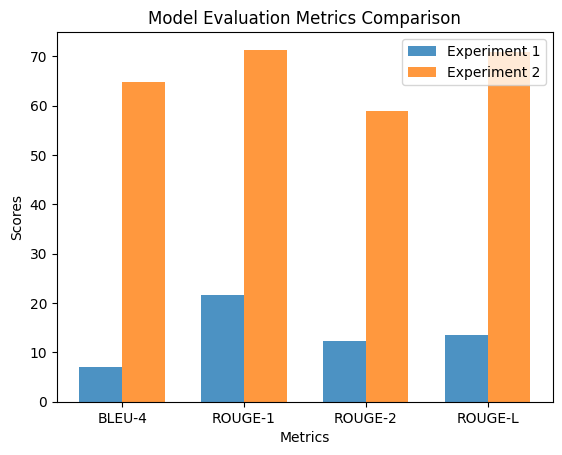

In [ ]:
# Plot the prediction results to compare the model performance
import json
import matplotlib.pyplot as plt
%matplotlib inline

def read_results(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

        def get_score(metric_key):
            metric_value = data.get(metric_key, 0)
            return metric_value.get('fmeasure', 0) if isinstance(metric_value, dict) else metric_value

        return {
            'BLEU-4': get_score('predict_bleu-4'),
            'ROUGE-1': get_score('predict_rouge-1'),
            'ROUGE-2': get_score('predict_rouge-2'),
            'ROUGE-L': get_score('predict_rouge-l'),
        }

results_paths = [
    '/content/LLaMA-Factory/saves/Qwen1.5-1.8B-Chat/lora/fineval/pretrained/predict_results.json',
    '/content/LLaMA-Factory/saves/Qwen1.5-1.8B-Chat/lora/fineval/finetuned/predict_results.json'
]

exp_results = [read_results(path) for path in results_paths]

metrics = ['BLEU-4', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L']
x = range(len(metrics))

fig, ax = plt.subplots()
x_offset = 0
for i, result in enumerate(exp_results):
    scores = [result[metric] for metric in metrics]
    ax.bar([xi + x_offset for xi in x], scores, width=0.35, align='center', alpha=0.8, label=f'Experiment {i+1}')
    x_offset += 0.35

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Evaluation Metrics Comparison')
ax.set_xticks([i + 0.175 for i in range(len(metrics))])
ax.set_xticklabels(metrics)
ax.legend()

plt.show()
plt.close()

In [ ]:
import json,re
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder

re_pretrained = '/content/LLaMA-Factory/saves/Qwen1.5-1.8B-Chat/lora/fineval/pretrained/generated_predictions.jsonl'
re_finetuned = '/content/LLaMA-Factory/saves/Qwen1.5-1.8B-Chat/lora/fineval/finetuned/generated_predictions.jsonl'


def load_predictions(path):
    y_true=[]
    y_pre=[]
    with open(path,'r',encoding='utf-8') as file:
      for line in file:
        data=json.loads(line)
        y_true.append(choice(data['label']))
        y_pre.append(choice(data['predict']))
    return y_true, y_pre

def calculate_f1_score(path):
    y_pred, y_true = load_predictions(path)
    le = LabelEncoder()
    y_true_num = le.fit_transform(y_true)
    y_pred_num = le.transform(y_pred)
    return f1_score(y_true_num, y_pred_num, average='macro')

def choice(text):
    match = re.findall(r'[A-D]', text)
    if not match:
      return ''
    last_match=match[-1]
    return ''.join(re.split(r'[、, ]+', last_match))



# Calculate F1 scores
f1_pretrained = calculate_f1_score(re_pretrained)
f1_finetuned = calculate_f1_score(re_finetuned)

print(f'Pretrained model F1-score: {f1_pretrained}')
print(f'Finetuned model F1-score: {f1_finetuned}')

Pretrained model F1-score: 0.32795078912498227
Finetuned model F1-score: 0.5164668764929704
